# Monte Carlo simulation on 2D Ising model

This is a simple excisise of 2D Ising model following the algorithm in [**MCMC implementation.ipynb**](https://nbviewer.jupyter.org/github/RuihaoQIU/MC-Magnetic-Phase-Transition/blob/master/MCMC%20implementation.ipynb).

In [3]:
#----------------------------------------------------------------------#
#   Import modules
#----------------------------------------------------------------------#
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
%matplotlib inline
plt.style.use('ggplot')

#----------------------------------------------------------------------#
#   Monte Carlo simulation parameters
#----------------------------------------------------------------------#
SIZE = 20                          # MC size SIZE * SIZE
STEPS = 100000                     # MC steps
collect_steps = 0.1*STEPS
T = 1                              # MC temperature (unit: K)
J = 1.0                            # Heisenberg interaction parameter 
                                   # (unit: meV)
#----------------------------------------------------------------------#
#   Define a function myFloat transform myList to float
#----------------------------------------------------------------------#
def myFloat(myList):
    return map(float, myList)


#----------------------------------------------------------------------#
#   Check periodic boundary conditions 
#----------------------------------------------------------------------#
def bc(i):
    if i+1 > SIZE-1:
        return 0
    if i-1 < 0:
        return SIZE-1
    else:
        return i


#----------------------------------------------------------------------#
#   Calculate energy (nearest interations) 
#----------------------------------------------------------------------#
def energy(system, N, M):
    return -1 * system[N,M] * J * (system[bc(N-1), M]
                               + system[bc(N+1), M]
                               + system[N, bc(M-1)]
                               + system[N, bc(M+1)])


#----------------------------------------------------------------------#
#   Build the system
#----------------------------------------------------------------------#
def build_system():
    sys = np.random.randint(2,size=(SIZE,SIZE))
    sys[sys==0] = -1

    return sys

init_system = build_system()        # Initial spin order


#----------------------------------------------------------------------#
#   calculate average magnetization
#----------------------------------------------------------------------#
def ave_mag(system):
    return np.sum(np.sum(system, axis=0))*1.0/SIZE**2


#----------------------------------------------------------------------#
#   Monte carlo loops
#----------------------------------------------------------------------#
def MC_loop(T, init_system):
    spin = 0
    system = init_system.copy()         # .copy() is a deep copy method, 
                                        # otherwise the 'init_system' will change when 'system' changes
#    f = open('mc_data', 'w')           # Spin order of each accepted MC step for visualization
    n_acpt = 0                          # Number of accepted MC steps

    for step, x in enumerate(range(STEPS)):
        M = np.random.randint(0,SIZE)
        N = np.random.randint(0,SIZE)

        E = -2. * energy(system, N, M)

        if E <= 0.:
            system[N,M] *= -1
#            np.savetxt(f,system,fmt='%3d')      # Save spin order for every accepted MC step for visualization
            n_acpt = n_acpt + 1

        elif np.exp(-1./T*E) > np.random.rand():
            system[N,M] *= -1
#            np.savetxt(f,system,fmt='%3d')
            n_acpt = n_acpt + 1
        
        
        if step >= STEPS - collect_steps:
            spin = spin + ave_mag(system)
        
            
    return system, n_acpt, spin/collect_steps
#    f.close()


final_system = MC_loop(T, init_system)[0]
n_acpt = MC_loop(T, init_system)[1]



#----------------------------------------------------------------------#
#   Monte carlo outputs
#----------------------------------------------------------------------#
def outputs():
    print '='*70
    print 'Number of accepted steps: {:6d}'.format(n_acpt)
    print 'Spin order of every MC step is save in file mc_data'
    print 'Average magnetization is {:4.2f}'.format(ave_mag(final_system))
    print '='*70,'\n'

    print '='*70
    print 'The initial spin order'
    print '='*70,'\n'
    print init_system,'\n'

    print '='*70
    print 'The final spinal order'
    print '='*70,'\n'
    print final_system,'\n'

outputs()

Number of accepted steps:   5230
Spin order of every MC step is save in file mc_data
Average magnetization is -0.99

The initial spin order

[[-1  1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1  1 -1  1 -1 -1  1]
 [-1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1]
 [ 1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1  1 -1 -1]
 [ 1 -1  1  1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1 -1  1  1 -1]
 [ 1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1]
 [-1  1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1  1  1  1  1]
 [ 1  1 -1  1 -1  1  1  1  1  1  1 -1  1 -1 -1  1  1  1  1 -1]
 [ 1 -1 -1 -1  1  1 -1  1  1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1]
 [ 1  1 -1 -1 -1  1 -1  1 -1  1 -1  1  1  1  1 -1  1 -1 -1 -1]
 [-1 -1  1 -1 -1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1]
 [-1 -1  1  1  1  1 -1 -1 -1  1  1 -1 -1  1  1  1 -1  1  1  1]
 [-1 -1  1  1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1  1]
 [ 1 -1  1  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1 -1 -1  1 -1]
 [-1  1 -1  1 -1 -1  1  1 -1 -1 -1  1 -1

## Visualize the MC process

### Visualize spin configurations with vectors

<img src="data-and-images/2d_vector.gif" style="width: 50%; height: 50%; float: left">

### Estimate the phase tranisition temperature

In [10]:
#----------------------------------------------------------------------#
#   Temperature vs. Magnetization
#----------------------------------------------------------------------#
Mag = []; Temp = [];
for i in range(20,1,-1):
    T = i*1.0/2
    Temp.append(T)
    final_system = MC_loop(T, init_system)[0]
##    Mag.append(abs(ave_mag(final_system)))
    Mag.append(abs(MC_loop(T, init_system)[2]))
    init_system = final_system.copy()
#print 'The average magnetization from 10K~1K:'
#print Mag[:]

The average magnetization from 10K~1K:
[0.012240500000000015, 0.0047254999999999728, 0.0066789999999998873, 0.0046255000000000454, 0.013049000000000012, 0.012341999999999995, 0.0097055000000000266, 0.040074999999999444, 0.06376899999999909, 0.00099449999999975188, 0.00079349999999985834, 0.075610499999998776, 0.052351500000001445, 0.041153000000000189, 0.16350199999999718, 0.72105699999998762, 0.91565050000001869, 0.99056049999993045, 0.99915349999999048]


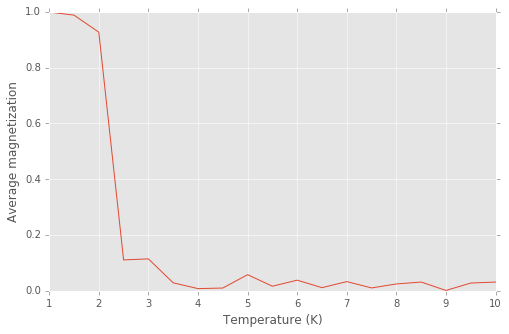

In [9]:
plt.figure(figsize=(8,5), )
plt.plot(Temp, Mag)
plt.xlabel('Temperature (K)')
plt.ylabel('Average magnetization')
plt.show()

The phase transition temperature is around 2~3 K, since this is a very coarse example. The model can be improved by the following ways: 

- Obtain the accurate Heisenberg parameter J from first principles calculation.
- Consider more interations from second or third nearest neighbors.
- Increase the size of the model, expand to 3D model.
- Paralize the calculation

In the 3D Ising model, I will make the above improvements.